In [1]:
import numpy as np
import pandas as pd
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4, suppress=True)

## 处理缺少数据

In [3]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

In [4]:
string_data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

Python内置的None值在对象数组中也可以作为NA

In [5]:
string_data[0] = None
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

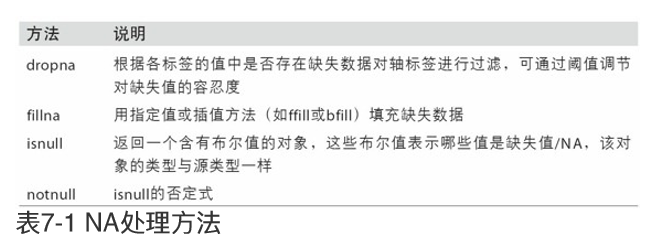

### 滤除缺失数据

In [2]:
from numpy import nan as NA
data = pd.Series([1, NA, 3.5, NA, 7])
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

dropna默认丢弃任何含有缺失值的行

In [7]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
cleaned = data.dropna()

In [8]:
#等价于
data[data.notnull()]

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [9]:
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [10]:
cleaned

,0,1,2
0,1.0,6.5,3.0


传入how='all' 将只丢弃全为NA的那些行

In [11]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [12]:
data[4] = NA
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [13]:
data.dropna(axis=1, how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


滤除DataFrame⾏的问题涉及时间序列数据。假设你只想 留下⼀部分观测数据，可以⽤thresh参数实现此⽬的

In [14]:
df = pd.DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,-0.204708,0.478943,-0.519439
1,-0.555730,1.965781,1.393406
2,0.092908,0.281746,0.769023
3,1.246435,1.007189,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [16]:
df.iloc[:4, 1] = NA

In [17]:
df.iloc[:2, 2] = NA

In [18]:
df

,0,1,2
0,-0.204708,NaN,NaN
1,-0.555730,NaN,NaN
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [19]:
df.dropna()

,0,1,2
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [21]:
df.dropna(thresh=2)

,0,1,2
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


### 填充缺失数据

通过⼀个常数调⽤fillna就会将 缺失值替换为那个常数值：

In [22]:
df.fillna(0)

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


通过一个字典调用fillna,就可以实现对不同的列填充不同的值

In [24]:
df.fillna({1: 0.5, 2: 0})

,0,1,2
0,-0.204708,0.500000,0.000000
1,-0.555730,0.500000,0.000000
2,0.092908,0.500000,0.769023
3,1.246435,0.500000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


fillna默认返回新对象，但也可以对现有对象进行就地修改

In [25]:
_ = df.fillna(0, inplace=True)
df

,0,1,2
0,-0.204708,0.000000,0.000000
1,-0.555730,0.000000,0.000000
2,0.092908,0.000000,0.769023
3,1.246435,0.000000,-1.296221
4,0.274992,0.228913,1.352917
5,0.886429,-2.001637,-0.371843
6,1.669025,-0.438570,-0.539741


In [26]:
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-0.204708,0.0,0.000000
1,-0.555730,0.0,0.000000
2,0.092908,NaN,0.769023
3,1.246435,NaN,-1.296221
4,0.274992,NaN,NaN
5,0.886429,NaN,NaN
6,1.669025,NaN,NaN


In [27]:
df.fillna(method='ffill')

,0,1,2
0,-0.204708,0.0,0.000000
1,-0.555730,0.0,0.000000
2,0.092908,0.0,0.769023
3,1.246435,0.0,-1.296221
4,0.274992,0.0,-1.296221
5,0.886429,0.0,-1.296221
6,1.669025,0.0,-1.296221


In [28]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-0.204708,0.0,0.000000
1,-0.555730,0.0,0.000000
2,0.092908,0.0,0.769023
3,1.246435,0.0,-1.296221
4,0.274992,NaN,-1.296221
5,0.886429,NaN,-1.296221
6,1.669025,NaN,NaN


利用fillna传入series的平均值或中位数

In [30]:
data = pd.Series([1, NA, 3.5, NA, 7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

In [31]:
data.fillna(data.mean())

0    1.000000
1    3.833333
2    3.500000
3    3.833333
4    7.000000
dtype: float64

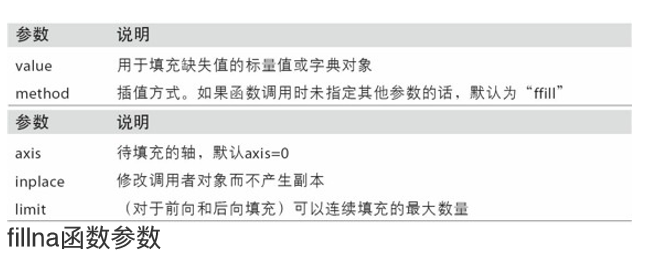

## 数据转换

### 移除重复数据

In [32]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [34]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [35]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [36]:
data['v1'] = range(7)

In [37]:
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [38]:
data.drop_duplicates(['k1']) 

,k1,k2,v1
0,one,1,0
1,two,1,1


duplicated和drop_duplicates默认保留的是第一个出现的值组合。传入keep='last'则保留最后一个

In [39]:
data.drop_duplicates(['k1','k2'], keep='last')

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### 利用函数或映射进行数据转换

In [41]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [42]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [43]:
lowercased = data['food'].str.lower()
lowercased

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [44]:
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


In [45]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

使⽤map是⼀种实现元素级转换以及其他数据清理⼯作的便捷⽅式。

### 替换值

In [47]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [48]:
data.replace(-999, np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

一次性替换多个值，可以传入一个有代替换值组成的列表以及一个替换值

In [49]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

让每个值有不同的替换值，可以传递一个替换列表

In [50]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

In [51]:
#也可以传入一个字典
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

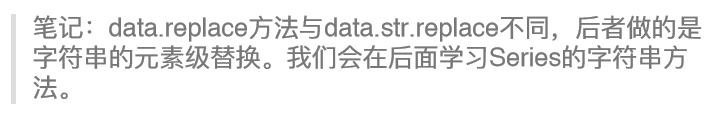

### 重命名轴索引

In [72]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'new York'],
                    columns=['one', 'two', 'three', 'four'])

In [73]:
transform = lambda x: x[:4].upper()
#transform = lambda x: x.upper()

In [74]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [75]:
data.index = data.index.map(transform)

In [76]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


如果创建数据集的转换版（而不是修改原始数据），比较实用的方法是rename
rename可以实现复制DataFrame并对其索引和列标签进⾏赋 值

In [77]:
data.rename(index=str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


In [79]:
data.rename(index={'OHIO': 'INDIANA'}, columns={'three':'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


In [80]:
data.rename(index={'OHIO': 'INDIANA'}, inplace=True)

In [81]:
data

,one,two,three,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


### 离散化和面元划分

In [82]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

将这些数据划分为“18到25”、“26到35”、“35到60”以及“60 以上”⼏个⾯元

In [83]:
bins = [18, 25, 35, 60, 100]

In [85]:
cats = pd.cut(ages, bins)   #左开右闭
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

pandas返回的是⼀个特殊的Categorical对象

In [87]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [88]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [89]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [90]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

In [91]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

In [96]:
#根据数据的最小值和最大值就算等长面元，
data = np.random.rand(20)
pd.cut(data, 4, precision=2)

[(0.77, 0.95], (0.41, 0.59], (0.22, 0.41], (0.59, 0.77], (0.41, 0.59], ..., (0.41, 0.59], (0.22, 0.41], (0.22, 0.41], (0.59, 0.77], (0.22, 0.41]]
Length: 20
Categories (4, interval[float64]): [(0.22, 0.41] < (0.41, 0.59] < (0.59, 0.77] < (0.77, 0.95]]

qcut是⼀个⾮常类似于cut的函数，它可以根据样本分位数对数据 进⾏⾯元划分

In [99]:
data = np.random.randn(1000)

In [102]:
cats = pd.qcut(data, 4)

In [103]:
cats

[(-0.029, 0.616], (0.616, 3.928], (0.616, 3.928], (0.616, 3.928], (-0.684, -0.029], ..., (-0.029, 0.616], (-0.029, 0.616], (-2.9499999999999997, -0.684], (-2.9499999999999997, -0.684], (-0.684, -0.029]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -0.684] < (-0.684, -0.029] < (-0.029, 0.616] < (0.616, 3.928]]

In [106]:
cats.value_counts()

(-2.9499999999999997, -0.684]    250
(-0.684, -0.029]                 250
(-0.029, 0.616]                  250
(0.616, 3.928]                   250
dtype: int64

In [107]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.0])  #自定义分位点

[(-0.029, 1.286], (-0.029, 1.286], (-0.029, 1.286], (-0.029, 1.286], (-1.176, -0.029], ..., (-0.029, 1.286], (-0.029, 1.286], (-1.176, -0.029], (-1.176, -0.029], (-1.176, -0.029]]
Length: 1000
Categories (4, interval[float64]): [(-2.9499999999999997, -1.176] < (-1.176, -0.029] < (-0.029, 1.286] < (1.286, 3.928]]

### 检测和过滤异常值

In [108]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.004794,-0.050389,0.046794,0.025429
std,0.996599,0.996706,0.997575,1.009162
min,-3.745356,-3.428254,-3.645860,-3.184377
25%,-0.697084,-0.747478,-0.599807,-0.612162
50%,-0.029924,-0.088274,0.043663,-0.011070
75%,0.699046,0.623331,0.746527,0.695298
max,2.735527,3.366626,2.653656,3.525865


In [109]:
col = data[2]
col

0     -0.669619
1      1.337508
2      0.137889
3     -1.869341
4      0.010867
         ...   
995   -0.485783
996   -0.457931
997   -1.365114
998   -1.088757
999    0.595405
Name: 2, Length: 1000, dtype: float64

In [110]:
col[np.abs(col) > 3]

540   -3.548824
799   -3.645860
Name: 2, dtype: float64

In [111]:
data[(np.abs(data) > 3).any(1)]  #选出全部含有“超过3或-3值”的行，可以在布尔型DataFrame中使用any方法

,0,1,2,3
38,-3.399312,-0.974657,-0.685312,-0.645858
56,-0.817649,0.050188,1.951312,3.260383
133,-3.745356,-1.520113,-0.346839,-0.696918
231,-1.341493,-0.293333,-0.242459,-3.056990
255,0.425384,-3.428254,-0.296336,-0.439938
318,-0.085420,0.275144,1.179227,-3.184377
540,-0.150923,-0.362528,-3.548824,1.553205
632,1.397822,3.366626,-2.372214,0.851010
778,0.582317,-0.658090,-0.207434,3.525865
799,-0.080332,0.599947,-3.645860,0.255475


将值限制在区间-3到3以内

In [112]:
data[np.abs(data) > 3] = np.sign(data)*3
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.003650,-0.050328,0.047988,0.024884
std,0.992788,0.994152,0.993553,1.005924
min,-3.000000,-3.000000,-3.000000,-3.000000
25%,-0.697084,-0.747478,-0.599807,-0.612162
50%,-0.029924,-0.088274,0.043663,-0.011070
75%,0.699046,0.623331,0.746527,0.695298
max,2.735527,3.000000,2.653656,3.000000


In [113]:
np.sign(data).head()

,0,1,2,3
0,1.0,-1.0,-1.0,1.0
1,-1.0,-1.0,1.0,-1.0
2,1.0,-1.0,1.0,-1.0
3,1.0,-1.0,-1.0,-1.0
4,-1.0,-1.0,1.0,1.0


### 排列和随机采样

In [114]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


利⽤numpy.random.permutation函数可以轻松实现对Series或 DataFrame的列的排列⼯作（permuting，随机重排序）。通过 需要排列的轴的⻓度调⽤permutation，可产⽣⼀个表示新顺序 的整数数组

In [115]:
sampler = np.random.permutation(5)
sampler

array([0, 3, 2, 1, 4])

In [116]:
df.take(sampler)

,0,1,2,3
0,0,1,2,3
3,12,13,14,15
2,8,9,10,11
1,4,5,6,7
4,16,17,18,19


如果不想⽤替换的⽅式选取随机⼦集，可以在Series和 DataFrame上使⽤sample⽅法：

In [117]:
df.sample(n=3)  #选取随机子集

,0,1,2,3
3,12,13,14,15
2,8,9,10,11
0,0,1,2,3


要通过替换的⽅式产⽣样本（允许重复选择），可以传递 replace=True到sample

In [118]:
choices = pd.Series([5, 7, -1, 6, 4])
choices

0    5
1    7
2   -1
3    6
4    4
dtype: int64

In [119]:
draws = choices.sample(n=10, replace=True)
draws

3    6
0    5
1    7
0    5
4    4
3    6
1    7
1    7
0    5
1    7
dtype: int64

In [120]:
choices

0    5
1    7
2   -1
3    6
4    4
dtype: int64

### 计算指标/哑变量

另⼀种常⽤于统计建模或机器学习的转换⽅式是：将分类变量 （categorical variable）转换为“哑变量”或“指标矩阵”

In [121]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [122]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [123]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


In [124]:
#DataFrame中的某行同属于多个分类，则事情就会有点复杂
mnames = ['movie_id', 'title', 'genres']
movies = pd.read_table('datasets/movielens/movies.dat', sep='::',
                       header=None, names=mnames)
movies[:10]

D:\Anaconda3\envs\crawler\lib\site-packages\pandas\io\parsers.py:767: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children's
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [128]:
all_genres = []
for x in movies.genres:
    all_genres.extend(x.split('|'))

genres = pd.unique(all_genres)

In [129]:
genres

array(['Animation', "Children's", 'Comedy', 'Adventure', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Sci-Fi', 'Documentary', 'War', 'Musical', 'Mystery', 'Film-Noir',
       'Western'], dtype=object)

In [130]:
zero_matrix = np.zeros((len(movies), len(genres)))
zero_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [131]:
dummies = pd.DataFrame(zero_matrix, columns=genres)

In [132]:
gen = movies.genres[0]
gen.split('|')

['Animation', "Children's", 'Comedy']

In [133]:
dummies.columns.get_indexer(gen.split('|'))

array([0, 1, 2], dtype=int64)

In [135]:
for i, gen in enumerate(movies.genres):
    indices = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, indices] = 1

In [136]:
movies_windic = movies.join(dummies.add_prefix('Genre_'))
movies_windic.iloc[0]

movie_id                                      1
title                          Toy Story (1995)
genres              Animation|Children's|Comedy
Genre_Animation                               1
Genre_Children's                              1
                               ...             
Genre_War                                     0
Genre_Musical                                 0
Genre_Mystery                                 0
Genre_Film-Noir                               0
Genre_Western                                 0
Name: 0, Length: 21, dtype: object

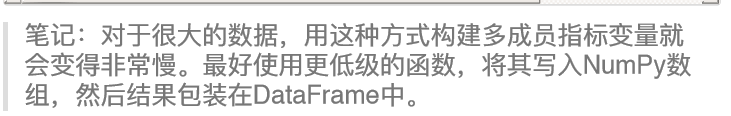

⼀个对统计应⽤有⽤的秘诀是：结合get_dummies和诸如cut之 类的离散化函数：


In [137]:
np.random.seed(12345)
values = np.random.rand(10)

In [138]:
values

array([0.9296, 0.3164, 0.1839, 0.2046, 0.5677, 0.5955, 0.9645, 0.6532,
       0.7489, 0.6536])

In [139]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1]
pd.get_dummies(pd.cut(values, bins))

,"(0.0, 0.2]","(0.2, 0.4]","(0.4, 0.6]","(0.6, 0.8]","(0.8, 1.0]"
0,0,0,0,0,1
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,0,0,1
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0


## 字符串操作

### 字符串对象方法

In [141]:
val = 'a, b, guido'
val.split(',')

['a', ' b', ' guido']

In [142]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [143]:
first, second, third = pieces
first + '::' + second + '::' + third

'a::b::guido'

In [144]:
'::'.join(pieces)

'a::b::guido'

In [145]:
'guido' in val

True

In [146]:
val.index(',')

1

In [147]:
val.find(':')

-1

注意find和index的区别：如果找不到字符串，index将会引发⼀ 个异常（⽽不是返回－1）： 

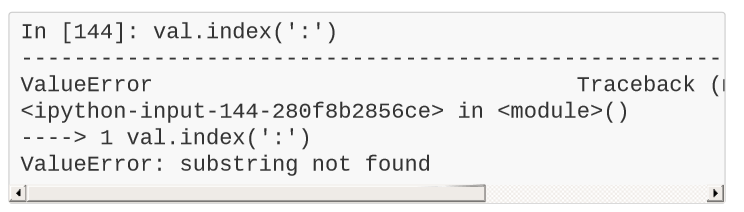

In [148]:
val.count(',')

2

In [149]:
val.replace(',', '::')

'a:: b:: guido'

In [150]:
val.replace(',', '')

'a b guido'

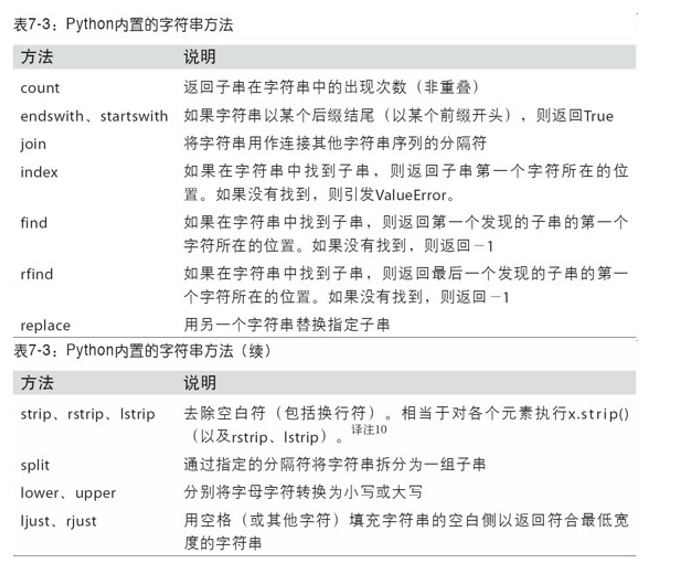

### 正则表达式

描述⼀个或多个空⽩符的 regex是\s+： 

In [151]:
import re

In [152]:
text = "foo    bar\t baz  \tqux"
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

In [153]:
regex = re.compile('\s+')
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [154]:
regex.findall(text)

['    ', '\t ', '  \t']

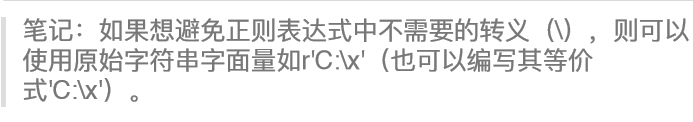

如果打算对许多字符串应⽤同⼀条正则表达式，强烈建议通过 re.compile创建regex对象。这样将可以节省⼤量的CPU时间。 

match和search跟findall功能类似。findall返回的是字符串中所有 的匹配项，⽽search则只返回第⼀个匹配项。match更加严格， 它只匹配字符串的⾸部。

In [155]:
text = """Dave dave@google.com
Steve steve@gmail.com
Rob rob@gmail.com
Ryan ryan@yahoo.com
"""
pattern = r'[A-Z0-9._%+-]+@[A-Z0-9.-]+\.[A-Z]{2,4}'

In [156]:
regex = re.compile(pattern, flags=re.IGNORECASE)

In [157]:
regex.findall(text)

['dave@google.com', 'steve@gmail.com', 'rob@gmail.com', 'ryan@yahoo.com']

In [159]:
m = regex.search(text)

In [160]:
m

<_sre.SRE_Match object; span=(5, 20), match='dave@google.com'>

In [161]:
text[m.start():m.end()]

'dave@google.com'

In [162]:
print(regex.match(text))  #因为她只匹配出现在字符串开头的模式

None


sub⽅法可以将匹配到的模式替换为指定字符串，并返 回所得到的新字符串

In [163]:
print(regex.sub('REDACTED', text))

Dave REDACTED
Steve REDACTED
Rob REDACTED
Ryan REDACTED



假设你不仅想要找出电⼦邮件地址，还想将各个地址分成3个部 分：⽤户名、域名以及域后缀。要实现此功能，只需将待分段的 模式的各部分⽤圆括号包起来即可

In [164]:
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
regex = re.compile(pattern, flags=re.IGNORECASE)

In [165]:
m = regex.match('wesm@bright.net')
m.groups()

('wesm', 'bright', 'net')

In [166]:
regex.findall(text)

[('dave', 'google', 'com'),
 ('steve', 'gmail', 'com'),
 ('rob', 'gmail', 'com'),
 ('ryan', 'yahoo', 'com')]

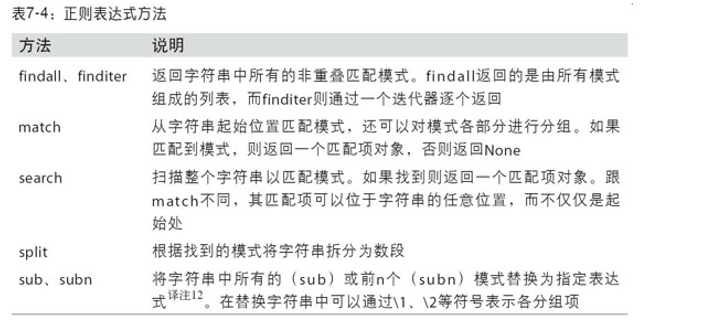

### pandas的矢量化字符串函数

In [167]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': np.nan}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes                  NaN
dtype: object

In [168]:
data.isnull()

Dave     False
Steve    False
Rob      False
Wes       True
dtype: bool

通过data.map，所有字符串和正则表达式⽅法都能被应⽤于（传 ⼊lambda表达式或其他函数）各个值，但是如果存在NA（null） 就会报错。为了解决这个问题，Series有⼀些能够跳过NA值的⾯ 向数组⽅法，进⾏字符串操作。通过Series的str属性即可访问这 些⽅法。例如，我们可以通过str.contains检查各个电⼦邮件地址 是否含有"gmail"： 

In [169]:
data.str.contains('gmail')

Dave     False
Steve     True
Rob       True
Wes        NaN
dtype: object

In [170]:
pattern

'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\\.([A-Z]{2,4})'

In [171]:
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                        NaN
dtype: object

有两个办法可以实现⽮量化的元素获取操作：要么使⽤str.get， 要么在str属性上使⽤索引： 

In [176]:
matches = data.str.match(pattern, flags=re.IGNORECASE)
matches

Dave     True
Steve    True
Rob      True
Wes       NaN
dtype: object

In [179]:
# matches.str.get(1)
# matches.str[0]

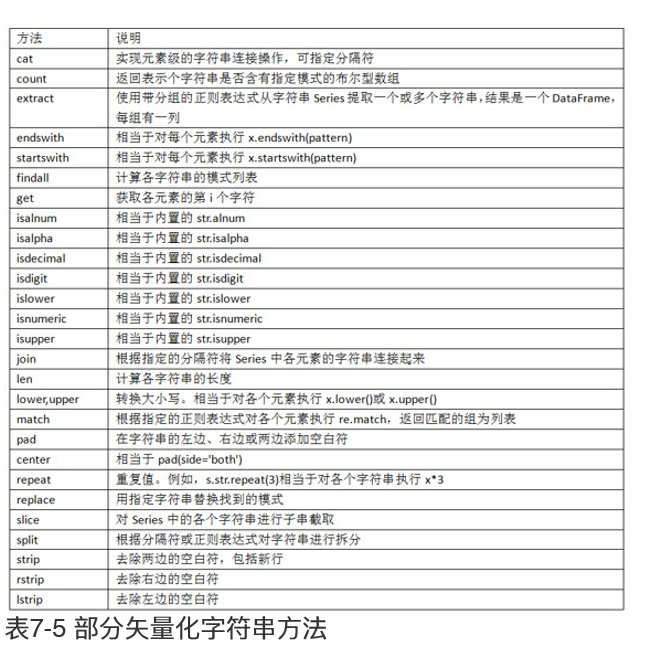